In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data['Sex']= data['Sex'].replace(['F', 'M', 'I'], [0,1,2])

In [10]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


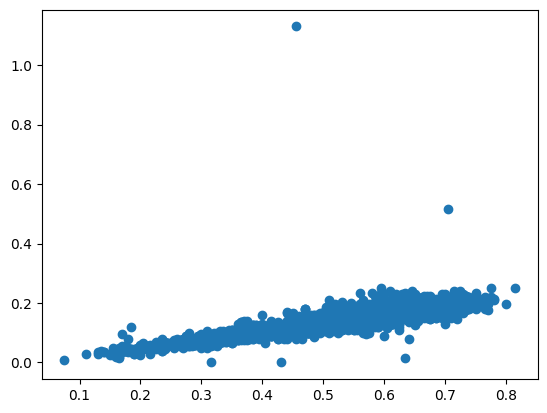

In [11]:
plt.scatter(data['Length'], data['Height'])
plt.show()

In [16]:
X_train = np.array(data['Length'])
Y_train = np.array(data['Height'])

In [19]:
X_train= X_train.reshape(-1,1)

In [20]:
X_train.shape

(4177, 1)

In [22]:
X_train.T.shape # transpose

(1, 4177)

In [14]:
Y_train

0       0.095
1       0.090
2       0.135
3       0.125
4       0.080
        ...  
4172    0.165
4173    0.135
4174    0.205
4175    0.150
4176    0.195
Name: Height, Length: 4177, dtype: float64

In [ ]:
# W = line slope
# W = (X.T * X)^-1 * X.T * Y

In [24]:
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), Y_train)
W

array([0.26735293])

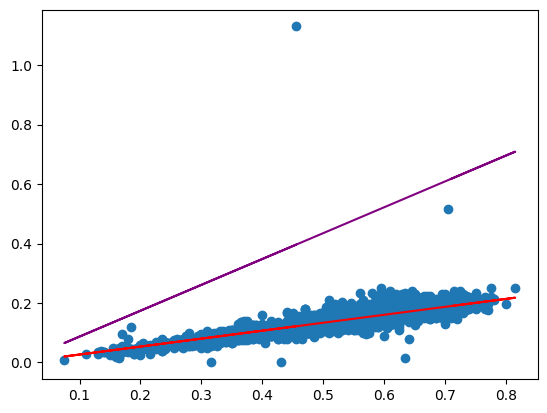

In [28]:
plt.scatter(data['Length'], data['Height'])
plt.plot(X_train, W*X_train, color='red')
plt.plot(X_train, 0.87 *X_train, color= 'purple')
plt.show()

In [29]:
# predict
new_length = 0.49
x = new_length

y_pred = W * x

height = y_pred
print(height)

[0.13100294]
